# DSC 540 - Advanced Machine Learning
# FINAL PROJECT ML
## Swathi Babu

### SUMMARY OF THE PROJECT:
The dataset is from UCI - https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29 
The dataset has reviews by customers with specific health conditions for specific drugs. The dataset has 6 features and 215063 instances. The data has been explored in further sections.

The aim of my project is to collect the reviews and perform text analysis like TF-IDF transformation and then use that information to predict rating classes using some popular classification algorithms. The concept is similar to sentimental analysis.

### Importing required packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Reading the datasets

In [3]:
#using pandas to read in the required datasets
train_df = pd.read_csv('drugsComTrain_raw.tsv',sep='\t', error_bad_lines = False)
train_df.columns = ['id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
test_df = pd.read_csv('drugsComTest_raw.tsv',sep='\t', error_bad_lines = False)
test_df.columns = ['id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']

In [4]:
train_df.head() #looking at the first 5 rows of the train dataset

,id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
test_df.head() #looking at the first 5 rows of the test dataset

,id,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


### Some basic statistics of the data

In [6]:
train_df.info() #some basic stats about the features in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


There are 7 variables and 161297 rows/instances. There are 4 categorical variables. There are also missing values in the condition column (899 values). For now, the variable isn't going to be used so we are not dealing with it.

In [7]:
test_df.info() #basic stats about the features in the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  object 
 6   usefulCount  53766 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


There are 53766 rows/instances in the test dataset.  There are also missing values in the condition column here too(295 values). 

In [8]:
train_df.describe(include = 'all') #Other stats

,id,drugName,condition,review,rating,date,usefulCount
count,161297.000000,161297,160398,161297,161297.000000,161297,161297.000000
unique,NaN,3436,884,112329,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,"March 1, 2016",NaN
freq,NaN,3657,28788,33,NaN,146,NaN
mean,115923.585305,NaN,NaN,NaN,6.994377,NaN,28.004755
std,67004.445170,NaN,NaN,NaN,3.272329,NaN,36.403742
min,2.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58063.000000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115744.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173776.000000,NaN,NaN,NaN,10.000000,NaN,36.000000


We can see that there are 3436 drugs in the dataset, 884 conditions being treated.

### Pre-Processing and Exploratory Analysis

#### Some Popular drugs

In [9]:
train_df['drugName'].value_counts() # counting the number of times each drug was rated and reviewed

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

'Levonorgestrel' is the drug that has been reviewed the most.

#### Looking at the data of the top 5 popular drugs

In [10]:
popDrugs = train_df['drugName'].value_counts()[:5] #taking the top 5 of the popular drugs
train_df.loc[train_df['drugName'].isin(popDrugs.index),:] #extracting the data of the 5 popular drugs

,id,drugName,condition,review,rating,date,usefulCount
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3.0,"August 7, 2014",10
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9.0,"August 11, 2014",11
69,85162,Ethinyl estradiol / norgestimate,Acne,"""Best treatment for acne I have used! I&#039;v...",9.0,"November 3, 2015",7
74,144224,Etonogestrel,Birth Control,"""My experience during the nexplon is great not...",10.0,"May 27, 2016",1
...,...,...,...,...,...,...,...
161257,142183,Levonorgestrel,Birth Control,"""There are some bad reviews about Kyleena - so...",10.0,"December 6, 2017",0
161262,144132,Etonogestrel,Birth Control,"""I got on the Nexplanon the same day I had my ...",3.0,"June 20, 2016",7
161264,143487,Etonogestrel,Birth Control,"""Honestly, this was the worst birth control I ...",3.0,"January 31, 2017",5
161269,73058,Ethinyl estradiol / norethindrone,Birth Control,"""When I first starting taking Lo Loestrin Fe, ...",10.0,"April 20, 2015",13


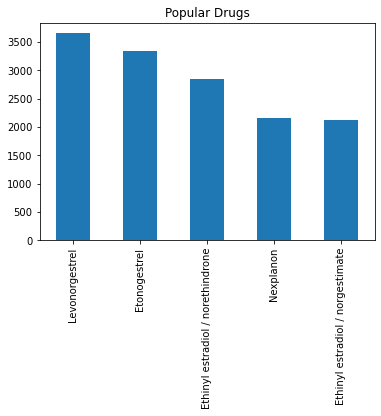

In [11]:
#plotting the top 5 drugs
popDrugs.plot(kind = 'bar')
plt.title('Popular Drugs')
plt.show()

In [12]:
# Top conditions for which the top 5 drugs were used
train_df.loc[train_df['drugName'].isin(popDrugs.index),'condition'].value_counts() 

Birth Control                                 11509
Emergency Contraception                        1221
Abnormal Uterine Bleeding                       509
Acne                                            344
Menstrual Disorders                              93
Endometriosis                                    84
Ovarian Cysts                                    54
Polycystic Ovary Syndrome                        53
Not Listed / Othe                                12
Postmenopausal Symptoms                           5
8</span> users found this comment helpful.        2
2</span> users found this comment helpful.        1
4</span> users found this comment helpful.        1
9</span> users found this comment helpful.        1
3</span> users found this comment helpful.        1
1</span> users found this comment helpful.        1
Name: condition, dtype: int64

'Birth Control' is the highest number of condition for which the drugs were used. The other conditions also seem to be for hormonal issues and a few other conditions

#### Most common conditions

In [13]:
train_df['condition'].value_counts() #Counting the conditions

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [14]:
popCond = train_df['condition'].value_counts()[:10] # the top 10 conditions
train_df.loc[train_df['condition'].isin(popCond.index),:] #extracting the data of the top 10 conditions

,id,drugName,condition,review,rating,date,usefulCount
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1
...,...,...,...,...,...,...,...
161277,18421,Zolpidem,Insomnia,"""I started taking this medication 10 years ago...",10.0,"November 16, 2008",103
161283,228492,Geodon,Bipolar Disorde,"""I was in a very bad place at the time I start...",3.0,"July 25, 2016",5
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33
161287,132177,Ativan,Anxiety,"""I was super against taking medication. I&#039...",9.0,"August 16, 2016",61


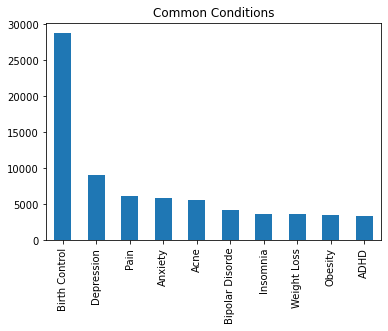

In [15]:
#plotting the top 10 conditions
popCond.plot(kind = 'bar')
plt.title('Common Conditions')
plt.show()

In [16]:
train_df.groupby('condition')['drugName'].nunique().nlargest(10) # Number of drugs reviewed for each condition

condition
Not Listed / Othe       214
Pain                    200
Birth Control           172
High Blood Pressure     140
Acne                    117
Depression              105
Rheumatoid Arthritis     98
Diabetes, Type 2         89
Allergic Rhinitis        88
Bipolar Disorde          80
Name: drugName, dtype: int64

#### Binning the 'rating' variable into 3 bins

In [17]:
train_df['rating_bin']=pd.cut(x=train_df['rating'], bins=[0,3,7,10], #to bin the variable rating into 3 categories
                        labels=["bad", " moderate", "good"])
test_df['rating_bin']=pd.cut(x=test_df['rating'], bins=[0,3,7,10], #to bin the variable rating into 3 categories
                        labels=["bad", " moderate", "good"])

#### Proportion of each class in the training set

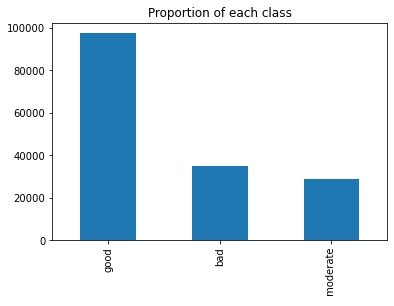

In [41]:
train_df['rating_bin'].value_counts().plot(kind = 'bar')
plt.title('Proportion of each class')
plt.show()

#### Extracting data that is required for the analysis (the reviews and the ratings)

In [18]:
X_train = train_df['review']
y_train = train_df['rating_bin']
X_test = test_df['review']
y_test = test_df['rating_bin']

#### Splitting the training set into training and validation set

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #splits into training and testing based on the test_size given

#### Proportion of each class in the validation set

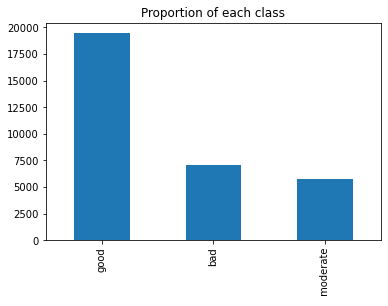

In [44]:
y_valid.value_counts().plot(kind = 'bar')
plt.title('Proportion of each class')
plt.show()

#### TF-IDF vectorizer for the reviews column
The reviews column after being vectorized becomes the variables to build the classifier model.

In [121]:
#TF-IDF VECTORIZER ON THE DATASET
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english',ngram_range=(1,2)) #initialising the TF-IDF transformation

x_train_vectors = vectorizer.fit_transform(X_train) #fitting and transforming the train set
x_valid_vectors = vectorizer.transform(X_valid) # based on the training set, the validation set is transformed
x_test_vectors = vectorizer.transform(X_test) #based on the training set, the testing set is transformed

selector = SelectKBest(f_classif, k=min(1000, x_train_vectors.shape[1])) #choosing the k best terms for the reviews
selector.fit(x_train_vectors, y_train)
x_train_vectors = selector.transform(x_train_vectors).astype('float32')

x_valid_vectors = selector.transform(x_valid_vectors).astype('float32')
x_test_vectors = selector.transform(x_test_vectors).astype('float32')

### Classification Models

In [94]:
def model_run_clf(model, train, val, train_y, val_y): #a function to run the classifier model --> similar style for multiple questions so I created a function
    clf = model.fit(train, train_y) #fitting the model
    predVal = clf.predict(val) #predicting using the validation set
    print('The training accuracy is ', model.score(train, train_y)) #training accuracy calculated using the score function
    print('The validation accuracy is ', model.score(val, val_y)) #validation accuracy calculated using the score function
    print('The balanced accuracy is',balanced_accuracy_score(val_y,predVal))#balanced accuracy for validation set
    cm = confusion_matrix(val_y, predVal) #confusion matrix
    print('\nThe confusion matrix:\n',cm)
    sns.heatmap(cm, annot = True, fmt='g')
    plt.show()
    print('\nThe performance metrics for the Validation data:\n',classification_report(val_y, predVal))

I will be trying 7 classifiers and try to improve the performance of the two best classifiers through various methods.

### 1. Multinomial Naive Bayes Classifier

The training accuracy is  0.6206901896355309
The validation accuracy is  0.6225046497210167
The balanced accuracy is 0.3635252190984493

The confusion matrix:
 [[    6    95  5658]
 [    3   639  6398]
 [    0    24 19437]]


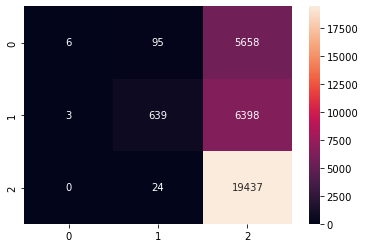


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.67      0.00      0.00      5759
         bad       0.84      0.09      0.16      7040
        good       0.62      1.00      0.76     19461

    accuracy                           0.62     32260
   macro avg       0.71      0.36      0.31     32260
weighted avg       0.68      0.62      0.50     32260



In [22]:
nb = MultinomialNB().fit(x_train_vectors, y_train) #initializing the classifier
model_run_clf(nb, x_train_vectors, x_valid_vectors, y_train, y_valid) #calling the function for the other processes

**NOTES:** 
Although the training accuracy and validation accuracy is around 62%, the balanced accuracy value id very low 36%. From the confusion matrix and the plot, we can see that class 2 ("good" rating - 7 to 10) has been predicted well but the other classes haven't been. Most of the prediction seem to be class 2 and class 0 and 1 have very low numbers. This model is definitely not doing well.

### 2. Logistic Regression

The training accuracy is  0.7215837317978564
The validation accuracy is  0.7181959082455053
The balanced accuracy is 0.5573514752741929

The confusion matrix:
 [[  850  1255  3654]
 [  470  4165  2405]
 [  425   882 18154]]


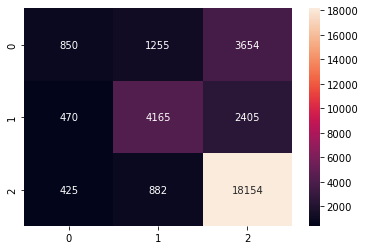


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.49      0.15      0.23      5759
         bad       0.66      0.59      0.62      7040
        good       0.75      0.93      0.83     19461

    accuracy                           0.72     32260
   macro avg       0.63      0.56      0.56     32260
weighted avg       0.68      0.72      0.68     32260



In [23]:
clf = LogisticRegression() #initialising the classifier
model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid) #calling the function for the other processes

**NOTES:**
This model is better than previous model but not the best. The training and validation accuracy are around 9% higher with values aorund 72%. The balanced accurcy is low at 55% here as well but it is better than the previous model. The class 2 is predicted really well here as well but the other classes have better metric values for this model than the previous one. 

### 3. Decision Tree Classifier

The training accuracy is  0.7034338988042189
The validation accuracy is  0.6479851208927464
The balanced accuracy is 0.5052082740627578

The confusion matrix:
 [[  937  1432  3390]
 [  561  3606  2873]
 [ 1166  1934 16361]]


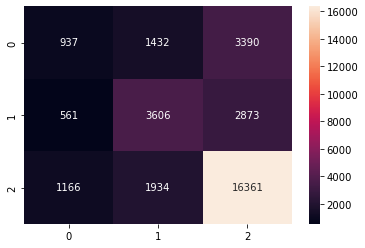


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.35      0.16      0.22      5759
         bad       0.52      0.51      0.51      7040
        good       0.72      0.84      0.78     19461

    accuracy                           0.65     32260
   macro avg       0.53      0.51      0.50     32260
weighted avg       0.61      0.65      0.62     32260



In [24]:
clf = DecisionTreeClassifier(min_samples_split=1000) #initialsing the classifier
model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid) #calling the function for the other processes

**NOTES:** 
This model seems to be performing better than Multinomial Naive Bayes model but not better than the Logistic regression model. The validation accuracy is 64% which is not the best value and the balanced accuracy is also low at 50%. Again, the class 2 has been predicted well, although not as well as the previous models. 

### 4. Random Forest Classifier

The training accuracy is  0.7373854010865101
The validation accuracy is  0.6993800371977681
The balanced accuracy is 0.5036394233732759

The confusion matrix:
 [[  126  1082  4551]
 [   27  3708  3305]
 [   26   707 18728]]


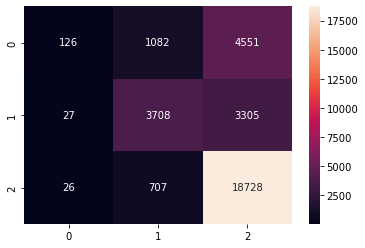


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.70      0.02      0.04      5759
         bad       0.67      0.53      0.59      7040
        good       0.70      0.96      0.81     19461

    accuracy                           0.70     32260
   macro avg       0.69      0.50      0.48     32260
weighted avg       0.70      0.70      0.63     32260



In [25]:
clf = RandomForestClassifier(min_samples_split=500) #initialising the classifier
model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid) #calling the function for the other processes

**NOTES:** 
This model has around 70% training and validation accuracy which is not bad but the balanced accuracy is low at 50%. Again, class 2 is predicted well but the other classes aren't especially, class 1 ("moderate" ratings), has a very low recall and f1-score.

### 5. Gradient Boosting Classifier

The training accuracy is  0.6635151158194936
The validation accuracy is  0.6611593304401736
The balanced accuracy is 0.43882832732756766

The confusion matrix:
 [[  250   551  4958]
 [  124  2095  4821]
 [   92   385 18984]]


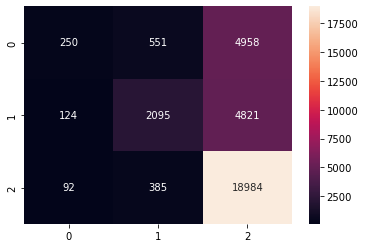


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.54      0.04      0.08      5759
         bad       0.69      0.30      0.42      7040
        good       0.66      0.98      0.79     19461

    accuracy                           0.66     32260
   macro avg       0.63      0.44      0.43     32260
weighted avg       0.64      0.66      0.58     32260



In [26]:
clf = GradientBoostingClassifier(min_samples_split=1000) #initialising the classifier
model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid)#calling the function for the other processes

**NOTES:** 
For this model, the training and validation accuracy are okay but the balanced accuracy is pretty low 43% (the second lowest followed by Mulitnomial NB classifier). Class 2 is predicted well but the other classes aren't. 

### 6. Bagging Classifier

The training accuracy is  0.9914210652758512
The validation accuracy is  0.7966831990080595
The balanced accuracy is 0.7338543012172439

The confusion matrix:
 [[ 3385   735  1639]
 [  636  5152  1252]
 [ 1166  1131 17164]]


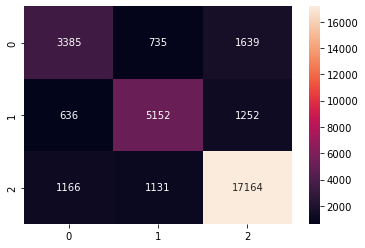


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.65      0.59      0.62      5759
         bad       0.73      0.73      0.73      7040
        good       0.86      0.88      0.87     19461

    accuracy                           0.80     32260
   macro avg       0.75      0.73      0.74     32260
weighted avg       0.79      0.80      0.79     32260



In [27]:
clf = BaggingClassifier(n_jobs=-1) #initialising the classifier
model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid) #calling the function for the other processes

**NOTES:**
This has been the best model so far with validation accuracy at 80% and balanced accuracy at 73%, the highest so far. This is also the only model that predicted class 0 and 1 well along with class 2. This model seems to be overfitting with training accuracy at 99% and the validation at 80%. This is still the best model so far and hence this issue can be addressed during parameter optimization.

### 7. AdaBoost Classifier

The training accuracy is  0.6613761944248548
The validation accuracy is  0.6619962802231866
The balanced accuracy is 0.46966206017928963

The confusion matrix:
 [[  184  1221  4354]
 [  128  3189  3723]
 [  172  1306 17983]]


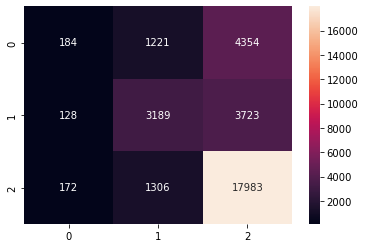


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.38      0.03      0.06      5759
         bad       0.56      0.45      0.50      7040
        good       0.69      0.92      0.79     19461

    accuracy                           0.66     32260
   macro avg       0.54      0.47      0.45     32260
weighted avg       0.61      0.66      0.60     32260



In [76]:
clf = AdaBoostClassifier() #initialising the classifier
model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid)#calling the function for the other processes

**NOTES:** This model didn't do well either. The accuracies for training and validation are around 66% and thr balanced accuracy is pretty low at 46%. In this model, class 2 is predicted well and class 0 ("bad" rating) is also okay but class 1 is predicted pretty bad.

### Two best Classifier models
The two best classifiers from above are **Bagging classifier** and **Logistic Regression**. To improve these models, we can do
* Parameter Optimization
* Removing Outliers
* PCA could help make it faster, although not more accurate

### Parameter Optimization

### Logistic Regression

LogisticRegression(C=1, max_iter=1000, multi_class='multinomial', penalty='l1',
                   solver='saga')
The training accuracy is  0.7273185210443516
The validation accuracy is  0.7220086794792312
The balanced accuracy is 0.5731728548539371

The confusion matrix:
 [[ 1036  1345  3378]
 [  558  4368  2114]
 [  583   990 17888]]


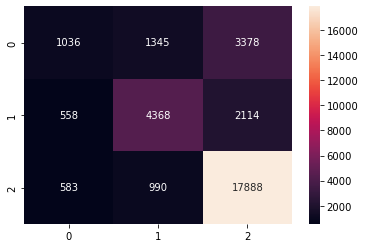


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.48      0.18      0.26      5759
         bad       0.65      0.62      0.64      7040
        good       0.77      0.92      0.84     19461

    accuracy                           0.72     32260
   macro avg       0.63      0.57      0.58     32260
weighted avg       0.69      0.72      0.69     32260



In [165]:
warnings.filterwarnings(action='ignore')
estimator = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 1000)
parameters = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'penalty': ['l1', 'l2', 'elasticnet']} #parameters to test
clf = GridSearchCV(estimator, parameters, cv = 3, scoring = 'balanced_accuracy', n_jobs = -1) #grid search with 3 fold cv that check all the possible parameter values
clf.fit(x_train_vectors, y_train)
print(clf.best_estimator_) #the best model
model_run_clf(clf.best_estimator_, x_train_vectors, x_valid_vectors, y_train, y_valid) #rest of the process for the best model

**NOTES:** This did not improve the model at all.

### Bagging Classifier

No. of estimators =  10
The training accuracy is  0.9913048195478816
The validation accuracy is  0.7974891506509609
The balanced accuracy is 0.7373468480952777

The confusion matrix:
 [[ 3396   764  1599]
 [  607  5238  1195]
 [ 1176  1192 17093]]


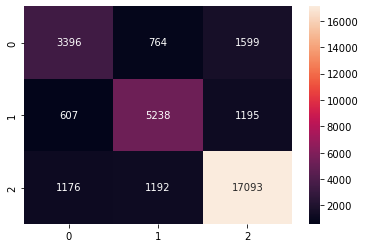


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.66      0.59      0.62      5759
         bad       0.73      0.74      0.74      7040
        good       0.86      0.88      0.87     19461

    accuracy                           0.80     32260
   macro avg       0.75      0.74      0.74     32260
weighted avg       0.79      0.80      0.80     32260

No. of estimators =  20
The training accuracy is  0.9964351310089354
The validation accuracy is  0.8116862988220707
The balanced accuracy is 0.7447103524294234

The confusion matrix:
 [[ 3379   708  1672]
 [  513  5245  1282]
 [  861  1039 17561]]


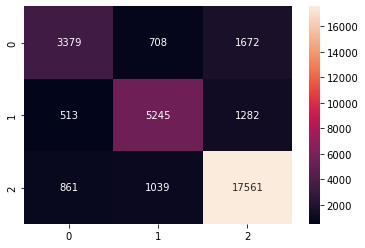


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.71      0.59      0.64      5759
         bad       0.75      0.75      0.75      7040
        good       0.86      0.90      0.88     19461

    accuracy                           0.81     32260
   macro avg       0.77      0.74      0.76     32260
weighted avg       0.81      0.81      0.81     32260

No. of estimators =  30
The training accuracy is  0.9978068305989755
The validation accuracy is  0.8115003099814011
The balanced accuracy is 0.7434605475532985

The confusion matrix:
 [[ 3316   701  1742]
 [  468  5292  1280]
 [  912   978 17571]]


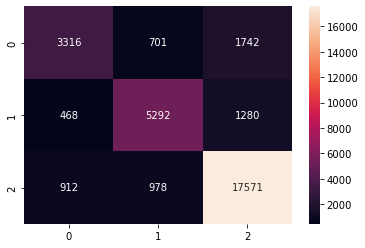


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.71      0.58      0.63      5759
         bad       0.76      0.75      0.76      7040
        good       0.85      0.90      0.88     19461

    accuracy                           0.81     32260
   macro avg       0.77      0.74      0.76     32260
weighted avg       0.81      0.81      0.81     32260

No. of estimators =  40
The training accuracy is  0.9980858203461023
The validation accuracy is  0.8183199008059516
The balanced accuracy is 0.7484613912539034

The confusion matrix:
 [[ 3324   660  1775]
 [  414  5322  1304]
 [  705  1003 17753]]


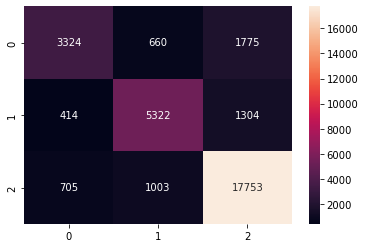


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.75      0.58      0.65      5759
         bad       0.76      0.76      0.76      7040
        good       0.85      0.91      0.88     19461

    accuracy                           0.82     32260
   macro avg       0.79      0.75      0.76     32260
weighted avg       0.81      0.82      0.81     32260



In [168]:
for i in range(10,50,10):
    print('No. of estimators = ',i)
    clf = BaggingClassifier(n_estimators = i, n_jobs=-1) #grid search takes too much time. So,I ran it manually
    model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid)

**NOTES:** The model metrics improved for the n_estimators 20 from the default value n_estimators 10. After 20, there wasn't significant improvement that is worth the extra run time. So, I would say n_estimators = 20 is the best value.

### Removing Outliers

In [66]:
iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(x_train_vectors)
mask = yhat != -1 #rows that are not outliers
mask1 = yhat==(-1) #rows that are outliers
print('Number of outliers removed: ', np.shape(x_train_vectors[mask1,:])[0])#Number of outliers
X1, y1 = x_train_vectors[mask, :], y_train[mask] #removing the outliers from the dataset

iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(x_valid_vectors)
mask = yhat != -1 #rows that are not outliers
mask1 = yhat==(-1) #rows that are outliers
print('Number of outliers removed: ', np.shape(x_valid_vectors[mask1,:])[0])#Number of outliers
X2, y2 = x_valid_vectors[mask, :], y_valid[mask] #removing the outliers from the dataset

Number of outliers removed:  1291
Number of outliers removed:  323


The training accuracy is  0.7212124058678941
The validation accuracy is  0.718570936531296
The balanced accuracy is 0.5556927674120744

The confusion matrix:
 [[  804  1244  3630]
 [  448  4105  2382]
 [  399   885 18040]]


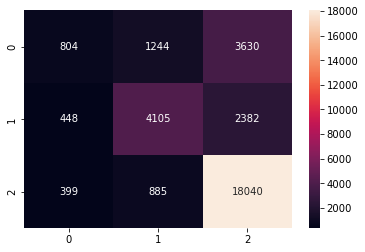


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.49      0.14      0.22      5678
         bad       0.66      0.59      0.62      6935
        good       0.75      0.93      0.83     19324

    accuracy                           0.72     31937
   macro avg       0.63      0.56      0.56     31937
weighted avg       0.68      0.72      0.68     31937



In [67]:
clf = LogisticRegression() #initialising the classifier
model_run_clf(clf, X1, X2, y1, y2) #rest of the process

The training accuracy is  0.9964539007092199
The validation accuracy is  0.8082474872405048
The balanced accuracy is 0.739208366989743

The confusion matrix:
 [[ 3234   738  1706]
 [  483  5188  1264]
 [  872  1061 17391]]


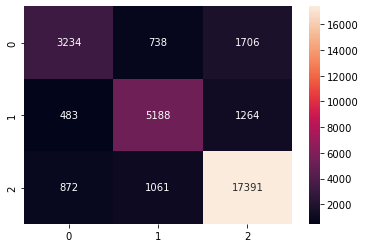


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.70      0.57      0.63      5678
         bad       0.74      0.75      0.75      6935
        good       0.85      0.90      0.88     19324

    accuracy                           0.81     31937
   macro avg       0.77      0.74      0.75     31937
weighted avg       0.80      0.81      0.80     31937



In [147]:
clf = BaggingClassifier(n_estimators = 20, n_jobs=-1)#initialising the classifier
model_run_clf(clf, X1, X2, y1, y2) #rest of the process

**NOTES:**
Removing the outliers did not help much in either of the models.

### PCA 

[0.02655158 0.04196609 0.05585487 0.06815713 0.07825279 0.08715349
 0.09584489 0.10413608 0.11206235 0.11941882 0.12638874 0.13311174
 0.13977446 0.14620099 0.15256024 0.1587669  0.16485333 0.17071829
 0.17639658 0.18191765 0.18727904 0.19252529 0.19767559 0.20277871
 0.20761535 0.21237478 0.21708893 0.22173246 0.2263056  0.23083536
 0.23529485 0.23973551 0.24411545 0.2484326  0.2526991  0.25690937
 0.26108406 0.26521547 0.26930839 0.27334836 0.27733014 0.28128676
 0.28521611 0.28908737 0.29293095 0.29670578 0.30043842 0.30414477
 0.30776891 0.31138708 0.31497819 0.31855257 0.32205737 0.32552822
 0.32897174 0.33237163 0.33574324 0.33908538 0.34237718 0.34564044
 0.34886247 0.35206808 0.35524906 0.35841386 0.36153163 0.36462078
 0.36768583 0.37073783 0.37376575 0.37673565 0.37966556 0.38258823
 0.38548421 0.38836502 0.39120651 0.39403394 0.39684595 0.39963648
 0.40240193 0.40515461 0.40789853 0.41061617 0.41332883 0.41600319
 0.41865419 0.42128517 0.42389289 0.42647561 0.42904744 0.4315

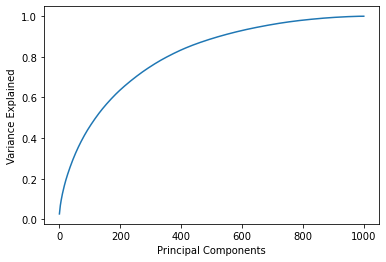

In [143]:
pca = PCA(n_components=None)# PCA initialising

pca.fit(x_train_vectors.A) #fitting it to the training set
X_train_pca = pca.transform(x_train_vectors.A) #transforming the training set
X_val_pca = pca.transform(x_valid_vectors.A) #transforming the validation set
X_test_pca = pca.transform(x_test_vectors.A) #transforming the test set

print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum());#plotting the variance
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [144]:
X_train_pca1 = X_train_pca[:, 0:865] #extracting 865 components form all the datasets
X_val_pca1 = X_val_pca[:, 0:865]
X_test_pca1 = X_test_pca[:, 0:865]

**NOTES:** 
Taking 865 principal components to get 99% variance, we get the following models.

### Logistic Regression

The training accuracy is  0.7199097933150956
The validation accuracy is  0.7171419714817111
The balanced accuracy is 0.5551404037452814

The confusion matrix:
 [[  813  1265  3681]
 [  440  4161  2439]
 [  402   898 18161]]


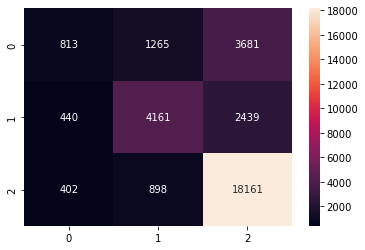


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.49      0.14      0.22      5759
         bad       0.66      0.59      0.62      7040
        good       0.75      0.93      0.83     19461

    accuracy                           0.72     32260
   macro avg       0.63      0.56      0.56     32260
weighted avg       0.68      0.72      0.68     32260



In [151]:
clf = LogisticRegression()#initialising the model
model_run_clf(clf, X_train_pca1, X_val_pca1, y_train, y_valid) #rest of the process

**NOTES:**
This is faster than the previous logistic regression model with the same performance as the previously best performing logistic regression model. So, this is not bad but there are still disadvantages with one class not being predicted very well.

### Bagging Classifier

The training accuracy is  0.9973108488263056
The validation accuracy is  0.8041227526348419
The balanced accuracy is 0.7247916547883865

The confusion matrix:
 [[ 3127   695  1937]
 [  445  5064  1531]
 [  726   985 17750]]


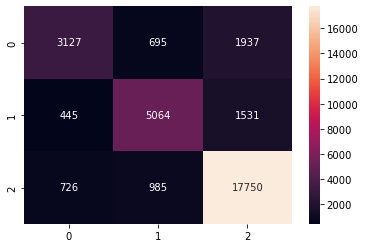


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.73      0.54      0.62      5759
         bad       0.75      0.72      0.73      7040
        good       0.84      0.91      0.87     19461

    accuracy                           0.80     32260
   macro avg       0.77      0.72      0.74     32260
weighted avg       0.80      0.80      0.80     32260



In [150]:
clf = BaggingClassifier(n_estimators = 20, n_jobs=-1) #initialising the model
model_run_clf(clf, X_train_pca1, X_val_pca1, y_train, y_valid) #rest of the model

**NOTES:** 
The model did not improve in this case. It performed a bit worse than the best model but not by much. This is pretty good for using lesser features and time.

### Choosing the model
Out of the two models, **the bagging classifier** performed the best with 74% balanced accuracy and 0.81 average f1 score. 

### Trying out one neural network model
### Multi-Layer Perceptron Classifier

The training accuracy is  0.9915218115734247
The validation accuracy is  0.8077185368877867
The balanced accuracy is 0.7478477809067106

The confusion matrix:
 [[ 3535   701  1523]
 [  790  5211  1039]
 [ 1319   831 17311]]


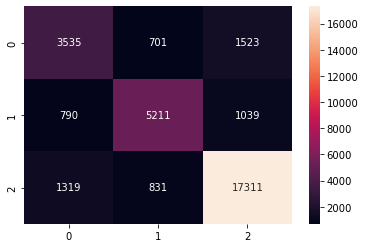


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.63      0.61      0.62      5759
         bad       0.77      0.74      0.76      7040
        good       0.87      0.89      0.88     19461

    accuracy                           0.81     32260
   macro avg       0.76      0.75      0.75     32260
weighted avg       0.81      0.81      0.81     32260



In [137]:
clf = MLPClassifier(random_state=1, max_iter=300) #initialising the model
model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid) #rest of the process

**NOTES:** We can see that this model performs as well as the best bagging classifier. So, if this model metrics can be improved, this would be a good final model. If the metrics cannot be improved, choosing a simpler model over a neural network model would be preferred for the same performance.

### Paramter optimization for MLP classifier

MLPClassifier(max_iter=1000, random_state=1)
The training accuracy is  0.9947921913869665
The validation accuracy is  0.8087104773713577
The balanced accuracy is 0.753887323357033

The confusion matrix:
 [[ 3626   712  1421]
 [  779  5270   991]
 [ 1413   855 17193]]


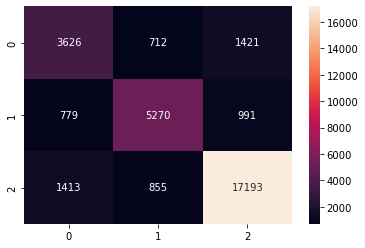


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.62      0.63      0.63      5759
         bad       0.77      0.75      0.76      7040
        good       0.88      0.88      0.88     19461

    accuracy                           0.81     32260
   macro avg       0.76      0.75      0.76     32260
weighted avg       0.81      0.81      0.81     32260



In [167]:
estimator = MLPClassifier(random_state=1, max_iter=1000)
parameters = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]}
clf = GridSearchCV(estimator, parameters, cv = 3, scoring = 'balanced_accuracy', n_jobs = -1)
clf.fit(x_train_vectors, y_train)
print(clf.best_estimator_)
model_run_clf(clf.best_estimator_, x_train_vectors, x_valid_vectors, y_train, y_valid)

**NOTES:**
The model improved very slightly but it has a very long run time. To choose the best classifier, the models are run on the test sets to see their performance.

### Peformance on Test set

### Bagging Classifier

The training accuracy is  0.9967063710408642
The validation accuracy is  0.8107168098798497
The balanced accuracy is 0.7422914755441431

The confusion matrix:
 [[ 5482  1227  2870]
 [  843  8898  2097]
 [ 1511  1629 29209]]


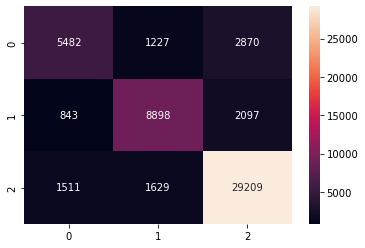


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.70      0.57      0.63      9579
         bad       0.76      0.75      0.75     11838
        good       0.85      0.90      0.88     32349

    accuracy                           0.81     53766
   macro avg       0.77      0.74      0.75     53766
weighted avg       0.81      0.81      0.81     53766

CPU times: user 1.9 s, sys: 347 ms, total: 2.24 s
Wall time: 4min 9s


In [158]:
%%time
clf = BaggingClassifier(n_estimators = 20, n_jobs=-1)
model_run_clf(clf, x_train_vectors, x_test_vectors, y_train, y_test)

**NOTES:**
The model performed pretty well on the testing set too. The balanced accuracy os 74.2% and the f1 score is 0.81. These values are similar to the training and validation scores. This model took 4 mins and 9 seconds to run. 

### MLP Classifier

The training accuracy is  0.9935134883793021
The validation accuracy is  0.8064204143882752
The balanced accuracy is 0.748709323935307

The confusion matrix:
 [[ 5917  1221  2441]
 [ 1314  8794  1730]
 [ 2302  1400 28647]]


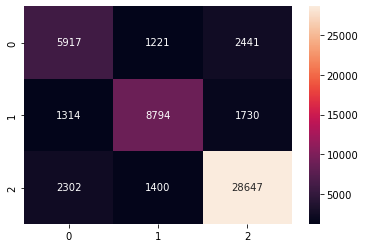


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.62      0.62      0.62      9579
         bad       0.77      0.74      0.76     11838
        good       0.87      0.89      0.88     32349

    accuracy                           0.81     53766
   macro avg       0.75      0.75      0.75     53766
weighted avg       0.81      0.81      0.81     53766

CPU times: user 15min 44s, sys: 4min 45s, total: 20min 30s
Wall time: 3min 5s


In [159]:
%%time
clf = MLPClassifier(alpha=1e-05, max_iter=300, random_state=1)
model_run_clf(clf, x_train_vectors, x_test_vectors, y_train, y_test)

**NOTES:**
This model also has done pretty well. The balanced acuuracy is 74.8% and the f1-score is 0.81. This model took 3 min and 5s to run which is way better than the previous model.

## ANSWER - FINAL CHOSEN MODEL

From the above tests, we can see that the best model can be either **bagging classifier** or **MLP classifier**. Performance wise, both the models performed very similar. The MLP classifier took lesser time to run but it is more complicated than the bagging classifier. So, keeping the complexity in mind, I would choose **BAGGING CLASSIFIER** as the final model. The results are summarized once more for the chosen model below.

Training and Validation
The training accuracy is  0.9966443733192805
The validation accuracy is  0.8101673899566026
The balanced accuracy is 0.7456046237910899

The confusion matrix:
 [[ 3403   710  1646]
 [  516  5270  1254]
 [  950  1048 17463]]


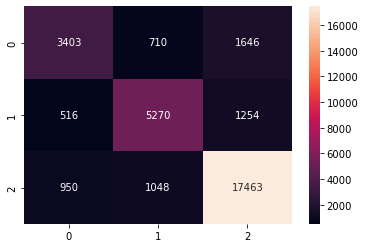


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.70      0.59      0.64      5759
         bad       0.75      0.75      0.75      7040
        good       0.86      0.90      0.88     19461

    accuracy                           0.81     32260
   macro avg       0.77      0.75      0.76     32260
weighted avg       0.81      0.81      0.81     32260

Training and Testing
The training accuracy is  0.9965746258824988
The validation accuracy is  0.8093590745080534
The balanced accuracy is 0.7407342193401765

The confusion matrix:
 [[ 5471  1248  2860]
 [  875  8868  2095]
 [ 1539  1633 29177]]


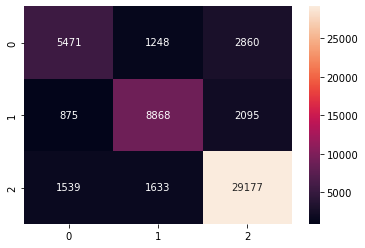


The performance metrics for the Validation data:
               precision    recall  f1-score   support

    moderate       0.69      0.57      0.63      9579
         bad       0.75      0.75      0.75     11838
        good       0.85      0.90      0.88     32349

    accuracy                           0.81     53766
   macro avg       0.77      0.74      0.75     53766
weighted avg       0.80      0.81      0.81     53766



In [161]:
print('Training and Validation')
clf = BaggingClassifier(n_estimators = 20, n_jobs=-1)
model_run_clf(clf, x_train_vectors, x_valid_vectors, y_train, y_valid)

print('Training and Testing')
clf = BaggingClassifier(n_estimators = 20, n_jobs=-1)
model_run_clf(clf, x_train_vectors, x_test_vectors, y_train, y_test)

### Findings

The model performance was pretty bad for some of the classic classification algorithms like decision tree. Although logistic regression comparatively did better than other models, it failed to predict one of the classes, metrics of class "moderate" was very low. Almost all classifiers had a problem with predicting that class, even the best classifier models had the lowest metrics for class "moderate". The class "good" was predicted the best, even the worst classifiers predicted that class really well. That could have been because there were more instances with class "good" than other models. The models that performed well were ensemble models and the neural network model. Keeping in mind the complexity of the models and the results, the final model was chosen to be **Bagging Classifier**

### What I could have done better?

If I had more time, 
* I would have tried to include the condition variable in the analysis too as that contributes to the ratings too. 
* I would have tried more complex models as this dataset seems to respond well to that, like try other neural network models.
* I would try more hyperparameters for MLP classifier to improve accuracy.